In [3]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

/tmp/ipykernel_1069/3099610739.py:87: RuntimeWarning: divide by zero encountered in log
  magnitude_plot = ax2.imshow(np.log(np.abs(f_transform_shifted_no_low)), cmap='gray')


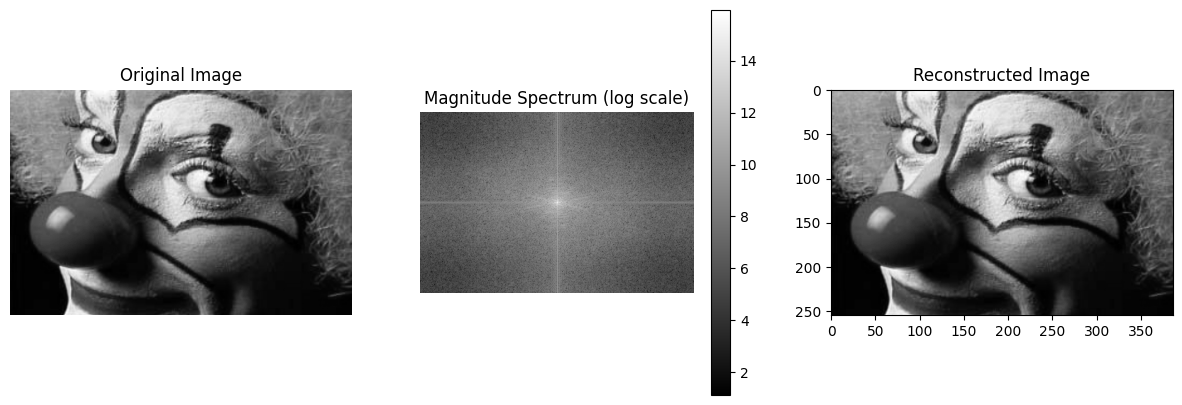

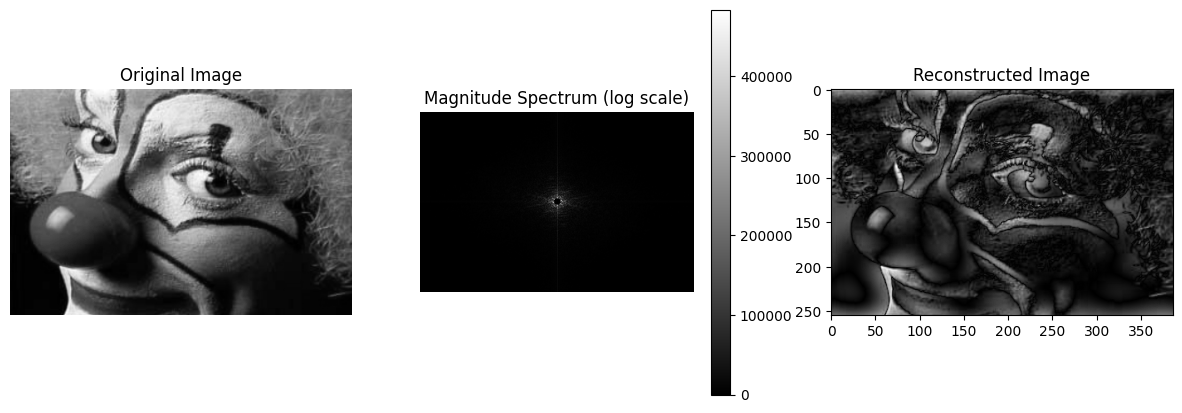

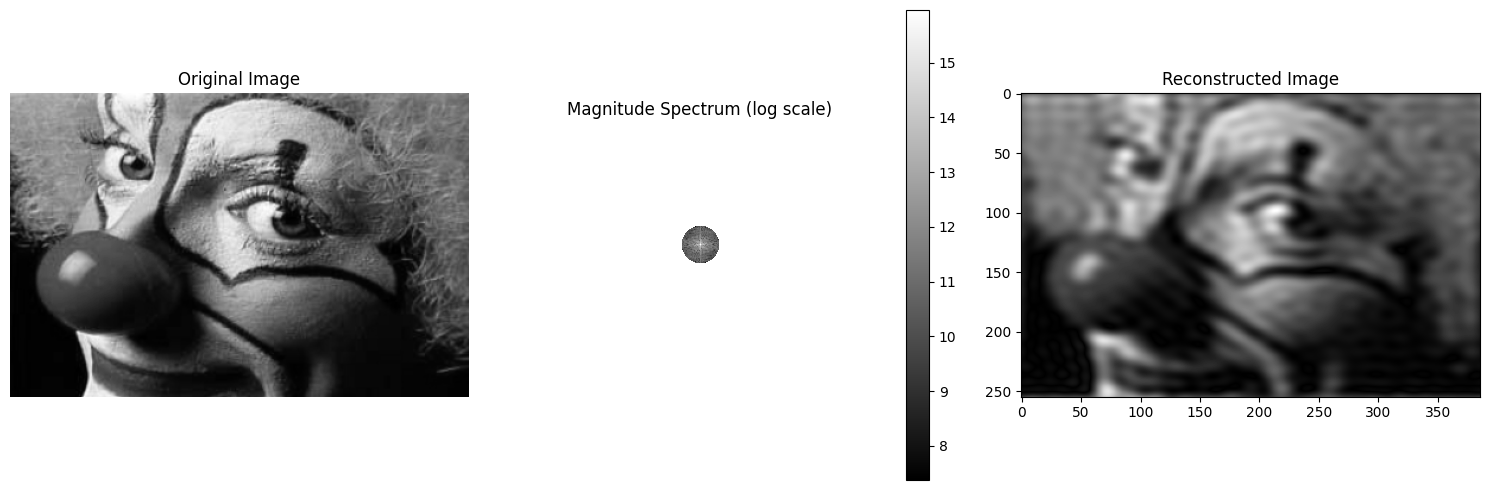

In [41]:
def image_to_fourier(image_array):
    """
    Convert image to Fourier transform and create visualizations
    
    Parameters:
    image_array: 2D numpy array of the image
    
    Returns:
    fig: matplotlib figure with original, magnitude and phase plots
    """
    # Compute the 2D Fourier Transform
    f_transform = np.fft.fft2(image_array)
    
    # Shift the zero frequency component to the center
    f_transform_shifted = np.fft.fftshift(f_transform)
    
    # Calculate magnitude spectrum (log scale)
    magnitude_spectrum = np.log(np.abs(f_transform_shifted))
    
    # Calculate phase spectrum
    phase_spectrum = np.angle(f_transform_shifted)
    
    # Create visualization
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    
    # Original image
    ax1.imshow(image_array, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')
    
    # Magnitude spectrum
    magnitude_plot = ax2.imshow(magnitude_spectrum, cmap='gray')
    ax2.set_title('Magnitude Spectrum (log scale)')
    ax2.axis('off')
    plt.colorbar(magnitude_plot, ax=ax2)
    
    # reconstruct the image
    f_transform_shifted_i = np.fft.ifftshift(f_transform_shifted)
    img_back = np.fft.ifft2(f_transform_shifted_i)
    img_back = np.abs(img_back)
    ax3.imshow(img_back, cmap='gray')
    ax3.set_title('Reconstructed Image')

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.imshow(image_array, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')

    # remove low frequencies
    rows, cols = image_array.shape
    crow, ccol = rows//2, cols//2
    r = 5

    f_transform_shifted_no_low = f_transform_shifted.copy()
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow)**2 + (j - ccol)**2) < r:
                f_transform_shifted_no_low[i, j] = 0

    magnitude_plot = ax2.imshow(np.abs(f_transform_shifted_no_low), cmap='gray')
    ax2.set_title('Magnitude Spectrum (log scale)')
    ax2.axis('off')
    plt.colorbar(magnitude_plot, ax=ax2)

    f_transform_shifted_i = np.fft.ifftshift(f_transform_shifted_no_low)
    img_back = np.fft.ifft2(f_transform_shifted_i)
    img_back = np.abs(img_back)
    ax3.imshow(img_back, cmap='gray')
    ax3.set_title('Reconstructed Image')

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.imshow(image_array, cmap='gray')
    ax1.set_title('Original Image')
    ax1.axis('off')

    # remove low frequencies
    rows, cols = image_array.shape
    crow, ccol = rows//2, cols//2
    r = 20

    f_transform_shifted_no_low = f_transform_shifted.copy()
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - crow)**2 + (j - ccol)**2) > r:
                f_transform_shifted_no_low[i, j] = 0

    magnitude_plot = ax2.imshow(np.log(np.abs(f_transform_shifted_no_low)), cmap='gray')
    ax2.set_title('Magnitude Spectrum (log scale)')
    ax2.axis('off')
    plt.colorbar(magnitude_plot, ax=ax2)

    f_transform_shifted_i = np.fft.ifftshift(f_transform_shifted_no_low)
    img_back = np.fft.ifft2(f_transform_shifted_i)
    img_back = np.abs(img_back)
    ax3.imshow(img_back, cmap='gray')
    ax3.set_title('Reconstructed Image')

    

    plt.tight_layout()
    return fig

def process_image(image_path):
    """
    Load and process an image file
    
    Parameters:
    image_path: str, path to the image file
    """
    # Load and convert image to grayscale
    img = Image.open(image_path).convert('L')
    
    # Convert to numpy array
    img_array = np.array(img)
    
    # Create and show the Fourier transform plots
    # fig = image_to_fourier(img_array)
    fig = image_to_fourier(img_array)
    plt.show()
    
    return fig

# Example usage
if __name__ == "__main__":
    # Replace with your image path
    image_path = "p.png"
    fig = process_image(image_path)


In [41]:
img = Image.open("p.png")
    
    # Convert to numpy array
img_array = np.array(img)
f_transform = np.fft.fft2(img_array)

    # Shift the zero frequency component to the center
f_transform_shifted = np.fft.fftshift(f_transform)
magnitude_spectrum = np.log2(np.abs(f_transform_shifted))

    # Calculate phase spectrum
phase_spectrum = np.angle(f_transform_shifted)

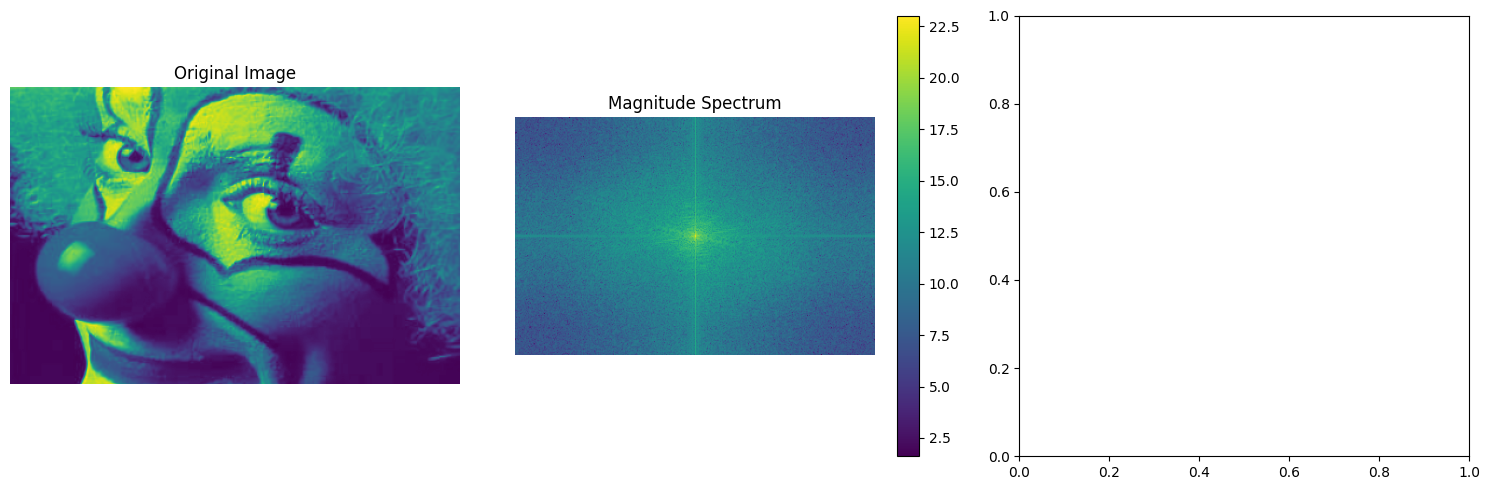

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Original image
ax1.imshow(img_array)
ax1.set_title('Original Image')
ax1.axis('off')

# Magnitude spectrum
magnitude_plot = ax2.imshow(magnitude_spectrum)
ax2.set_title('Magnitude Spectrum')
ax2.axis('off')
plt.colorbar(magnitude_plot, ax=ax2)

# Phase spectrum
# phase_plot = ax3.imshow(phase_spectrum, cmap='twilight')
# ax3.set_title('Phase Spectrum')
# ax3.axis('off')
# plt.colorbar(phase_plot, ax=ax3)

plt.tight_layout()

In [45]:
magnitude_spectrum

array([[6.13830122, 7.30390187, 7.09839119, ..., 7.67732365, 7.56404731,
        7.04507145],
       [7.7921436 , 7.37715519, 7.58167344, ..., 7.54848649, 7.92121825,
        6.59208882],
       [7.73102848, 6.9339747 , 7.01016581, ..., 7.12412016, 7.7503486 ,
        7.23154925],
       ...,
       [7.73102848, 7.23154925, 7.7503486 , ..., 8.06031245, 7.01016581,
        6.9339747 ],
       [7.7921436 , 6.59208882, 7.92121825, ..., 6.68684129, 7.58167344,
        7.37715519],
       [6.13830122, 7.04507145, 7.56404731, ..., 5.71183611, 7.09839119,
        7.30390187]])